# Final homework
## Sage Madden
## 12/21/21

The Data
For this project you are going to be using some data sets about flights departing New York City in 2013. There are several CSV files you will need to use (as with any CSVs you’re handed, they are likely imperfect and incomplete). You should download the flights, planes, and weather CSV files. (Remember to put them into your data folder of your RProject to make reading them in easier!)

Hint: You may have to combine dataframes to answer some questions. Remember our join family of functions? You should be able to use the join type we covered in class. The flights dataset is the biggest one, so you should probably join the other data onto this one, meaning flights would be the first (of “left”) argument in the left join. You can’t join 3 tables together at once, but you can join tables a and b to make table ab, then join ab and c to get table abc which contains the columns from all 3 original tables.

Things to Include
Plot the departure delay of flights against the precipitation, and include a simple regression line as part of the plot. Hint: there is a geom_ that will plot a simple y ~ x regression line for you, but you might have to use an argument to make sure it’s a regular linear model. Use ggsave to save your ggplot objects into a new folder you create called “plots”.
Create a figure that has date on the x axis and each day’s mean departure delay on the y axis. Plot only months September through December. Somehow distinguish between airline carriers (the method is up to you). Again, save your final product into the “plot” folder.
Create a dataframe with these columns: date (year, month and day), mean_temp, where each row represents the airport, based on airport code. Save this is a new csv into you data folder called mean_temp_by_origin.csv.
Make a function that can: (1) convert hours to minutes; and (2) convert minutes to hours (i.e., it’s going to require some sort of conditional setting in the function that determines which direction the conversion is going). Use this function to convert departure delay (currently in minutes) to hours and then generate a boxplot of departure delay times by carrier. Save this function into a script called “customFunctions.R” in your scripts/code folder.
Below is the plot we generated from the new data in Q4. (Base code: ggplot(df, aes(x = dep_delay_hrs, y = carrier, fill = carrier)) +   geom_boxplot()). The goal is to visualize delays by carrier. Do (at least) 5 things to improve this plot by changing, adding, or subtracting to this plot. The sky’s the limit here, remember we often reduce data to more succinctly communicate things.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from dplython import (DplyFrame, X, diamonds, select, sift,
  sample_n, sample_frac, head, arrange, mutate, group_by,
  summarize, DelayFunction)
import plotnine as p9
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

In [6]:
# Read in data
flights = DplyFrame(pd.read_csv("../data/nyc_13_flights_small.csv"))
planes = DplyFrame(pd.read_csv("../data/nyc_13_planes.csv"))
weather = DplyFrame(pd.read_csv("../data/nyc_13_weather.csv"))

# View data summaries
print(flights.head)
print(planes.head)
print(weather.head)

# Column names
print(flights.columns)
print(planes.columns)
print(weather.columns)

<bound method NDFrame.head of        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0      2013     10   16    1757.0            1805       -8.0    2013.0   
1      2013      7   14    1952.0            1930       22.0    2243.0   
2      2013      9   12    2042.0            1600      282.0    2316.0   
3      2013     10   25     624.0             630       -6.0     825.0   
4      2013      9    2    1308.0            1314       -6.0    1514.0   
...     ...    ...  ...       ...             ...        ...       ...   
49995  2013      1    1    1608.0            1600        8.0    1953.0   
49996  2013     10   18    2016.0            1947       29.0    2309.0   
49997  2013     12    2    1422.0            1420        2.0    1642.0   
49998  2013      3    7    1920.0            1920        0.0    2059.0   
49999  2013      6   15    1859.0            1900       -1.0    2145.0   

       sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
0        

Plot the departure delay of flights against the precipitation, and include a simple regression line as part of the plot. Hint: there is a geom_ that will plot a simple y ~ x regression line for you, but you might have to use an argument to make sure it’s a regular linear model. Use ggsave to save your ggplot objects into a new folder you create called “plots”.

In [15]:
# Departure delay is in the flights df
# Precipitation is in the weather df
# These two need to be joined 
flights_weather = pd.merge(flights, weather, how = "left", on = ["origin", "year", "month", "day", "hour", "time_hour"])

# This only contains weather at the flight time
print(flights_weather.head)

# I'll also join them with planes for good measure
flights_weather_planes = pd.merge(flights_weather, planes, how = "left", on = ["tailnum"])

print(flights_weather_planes.head)

<bound method NDFrame.head of        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0      2013     10   16    1757.0            1805       -8.0    2013.0   
1      2013      7   14    1952.0            1930       22.0    2243.0   
2      2013      9   12    2042.0            1600      282.0    2316.0   
3      2013     10   25     624.0             630       -6.0     825.0   
4      2013      9    2    1308.0            1314       -6.0    1514.0   
...     ...    ...  ...       ...             ...        ...       ...   
49995  2013      1    1    1608.0            1600        8.0    1953.0   
49996  2013     10   18    2016.0            1947       29.0    2309.0   
49997  2013     12    2    1422.0            1420        2.0    1642.0   
49998  2013      3    7    1920.0            1920        0.0    2059.0   
49999  2013      6   15    1859.0            1900       -1.0    2145.0   

       sched_arr_time  arr_delay carrier  ...             time_hour   temp  \
0  

c:\users\sagem\appdata\local\programs\python\python37\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 6 x 6 in image.
c:\users\sagem\appdata\local\programs\python\python37\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../output/precip_dep_delay.png
c:\users\sagem\appdata\local\programs\python\python37\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1477 rows containing missing values.
c:\users\sagem\appdata\local\programs\python\python37\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1477 rows containing missing values.


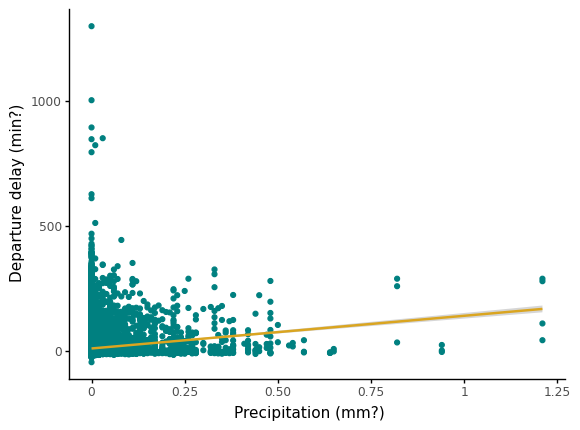

<ggplot: (-9223371901658632728)>

In [20]:
precip_delay = (p9.ggplot(data = flights_weather_planes,
           mapping = p9.aes(y = "dep_delay", x = "precip")) 
                + p9.geom_point(color = "teal") 
                + p9.geom_smooth(method = "lm", color = "goldenrod")
                + p9.labs(x = "Precipitation (mm?)", y = "Departure delay (min?)")
                + p9.theme_classic()
               )

#precip_delay.save("../output/precip_dep_delay.png", height = 6, width = 6)

precip_delay

Create a figure that has date on the x axis and each day’s mean departure delay on the y axis. Plot only months September through December. Somehow distinguish between airline carriers (the method is up to you). Again, save your final product into the “plot” folder.

In [9]:
daily_delay_summ = flights_weather_planes >> group_by(X.month, X.day) >> summarize(mean_daily_dep_delay = X.dep_delay.mean())
print(daily_delay_summ.head)

carriers_df = flights_weather_planes >> select(X.month, X.day, X.carrier)

daily_delay_df = pd.merge(daily_delay_summ, carriers_df, how = "left", on = ["month", "day"])
print(daily_delay_df)

daily_delay_df = daily_delay_df >> sift(X.month > 8)

daily_delay_df.insert(0,"month_names","")

# Created this to try to change the facet names, but they are in the wrong order in the plot (alphabetized so Dec is first)
for i in range(len(daily_delay_df)):
    if daily_delay_df["month"].iloc[i] == 9:
        daily_delay_df["month_names"].iloc[i] = "September"
    elif daily_delay_df["month"].iloc[i] == 10:
        daily_delay_df["month_names"].iloc[i] = "October"
    elif daily_delay_df["month"].iloc[i] == 11:
        daily_delay_df["month_names"].iloc[i] = "November"
    else:
        daily_delay_df["month_names"].iloc[i] = "December"
        

print(daily_delay_df.head)


<bound method NDFrame.head of      month  day  mean_daily_dep_delay
0        1    1             14.991228
1        1    2             13.697479
2        1    3             10.232558
3        1    4              8.125000
4        1    5              1.808081
..     ...  ...                   ...
360     12   27             11.443662
361     12   28              5.204918
362     12   29             24.230769
363     12   30             10.104167
364     12   31              5.921875

[365 rows x 3 columns]>
       month  day  mean_daily_dep_delay carrier
0          1    1             14.991228      AA
1          1    1             14.991228      UA
2          1    1             14.991228      DL
3          1    1             14.991228      B6
4          1    1             14.991228      AA
...      ...  ...                   ...     ...
49995     12   31              5.921875      DL
49996     12   31              5.921875      B6
49997     12   31              5.921875      9E
49998    

c:\users\sagem\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<bound method NDFrame.head of       month_names  month  day  mean_daily_dep_delay carrier
33372   September      9    1              1.966387      DL
33373   September      9    1              1.966387      EV
33374   September      9    1              1.966387      DL
33375   September      9    1              1.966387      WN
33376   September      9    1              1.966387      B6
...           ...    ...  ...                   ...     ...
49995    December     12   31              5.921875      DL
49996    December     12   31              5.921875      B6
49997    December     12   31              5.921875      9E
49998    December     12   31              5.921875      B6
49999    December     12   31              5.921875      UA

[16628 rows x 5 columns]>


c:\users\sagem\appdata\local\programs\python\python37\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 6 x 6 in image.
c:\users\sagem\appdata\local\programs\python\python37\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: ../output/daily_dep_delay.png


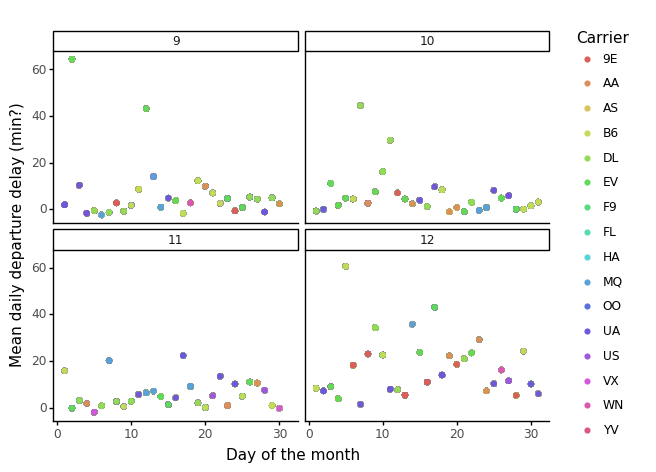

<ggplot: (-9223371901659472500)>

In [19]:
daily_dep = (p9.ggplot(data = daily_delay_df,
           mapping = p9.aes(y = "mean_daily_dep_delay", x = "day", color = "carrier")) 
                + p9.geom_point() 
                + p9.facet_wrap("month")
                + p9.labs(x = "Day of the month", y = "Mean daily departure delay (min?)", color = "Carrier")
                + p9.theme_classic()
               )


#daily_dep.save("../output/daily_dep_delay.png", height = 6, width = 6)

daily_dep

Create a dataframe with these columns: date (year, month and day), mean_temp, where each row represents the airport, based on airport code. Save this is a new csv into you data folder called mean_temp_by_origin.csv.

In [18]:
temp_origin = flights_weather_planes >> select(X.year_x, X.month, X.day, X.temp, X.origin) >> group_by(X.origin, X.year_x, X.month, X.day, X.temp) >> summarize(mean_temp = X.temp.mean())

print(temp_origin.head)

#temp_origin.to_csv('../data/mean_temp_by_origin.csv', index=False)

<bound method NDFrame.head of       origin  year_x  month  day   temp  mean_temp
0        EWR    2013      1    1  30.02      30.02
1        EWR    2013      1    1  32.00      32.00
2        EWR    2013      1    1  33.08      33.08
3        EWR    2013      1    1  33.98      33.98
4        EWR    2013      1    1  35.96      35.96
...      ...     ...    ...  ...    ...        ...
10349    LGA    2013     12   30  37.04      37.04
10350    LGA    2013     12   30  37.94      37.94
10351    LGA    2013     12   30  41.00      41.00
10352    LGA    2013     12   30  42.98      42.98
10353    LGA    2013     12   30  44.06      44.06

[10354 rows x 6 columns]>


Make a function that can: (1) convert hours to minutes; and (2) convert minutes to hours (i.e., it’s going to require some sort of conditional setting in the function that determines which direction the conversion is going). Use this function to convert departure delay (currently in minutes) to hours and then generate a boxplot of departure delay times by carrier. Save this function into a script called “customFunctions.R” in your scripts/code folder.

In [44]:
# Create function to convert between hours and minutes
def convert_hours_minutes(time, output):
    if output == "Minutes":
        return(time*60)
    elif output == "Hours":
        return(time/60)
    else:
        return("Invalid output. Valid outputs: 'Minutes', 'Hours'")

# Not sure how to save this as a separate script without creating a new markdown...

# Currently only takes single values or arrays as inputs, not lists

# Test my function
print(convert_hours_minutes(2, "Minutes"))
print(convert_hours_minutes(np.asarray([2, 4, 5]), "Minutes"))
print(convert_hours_minutes(60, "Hours"))
print(convert_hours_minutes(60, "Days"))

120
[120 240 300]
1.0
Invalid output. Valid outputs: 'Minutes', 'Hours'


In [43]:
# Use my function to convert departure delay to hours
# Mutate doesn't work, I think because of the series data structure
flights_weather_planes["dep_delay_hours"] = ""

for i in range(len(flights_weather_planes["dep_delay"])):
    flights_weather_planes["dep_delay_hours"].iloc[i] = convert_hours_minutes(flights_weather_planes["dep_delay"].iloc[i], "Hours")
    

print(flights_weather_planes.head)

c:\users\sagem\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<bound method NDFrame.head of        year_x  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0        2013     10   16    1757.0            1805       -8.0    2013.0   
1        2013      7   14    1952.0            1930       22.0    2243.0   
2        2013      9   12    2042.0            1600      282.0    2316.0   
3        2013     10   25     624.0             630       -6.0     825.0   
4        2013      9    2    1308.0            1314       -6.0    1514.0   
...       ...    ...  ...       ...             ...        ...       ...   
49995    2013      1    1    1608.0            1600        8.0    1953.0   
49996    2013     10   18    2016.0            1947       29.0    2309.0   
49997    2013     12    2    1422.0            1420        2.0    1642.0   
49998    2013      3    7    1920.0            1920        0.0    2059.0   
49999    2013      6   15    1859.0            1900       -1.0    2145.0   

       sched_arr_time  arr_delay carrier  ...  visib  yea

Below is the plot we generated from the new data in Q4. (Base code: ggplot(df, aes(x = dep_delay_hrs, y = carrier, fill = carrier)) +   geom_boxplot()). The goal is to visualize delays by carrier. Do (at least) 5 things to improve this plot by changing, adding, or subtracting to this plot. The sky’s the limit here, remember we often reduce data to more succinctly communicate things.

<class 'numpy.float64'>
<class 'numpy.float64'>


c:\users\sagem\appdata\local\programs\python\python37\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_boxplot : Removed 1228 rows containing non-finite values.


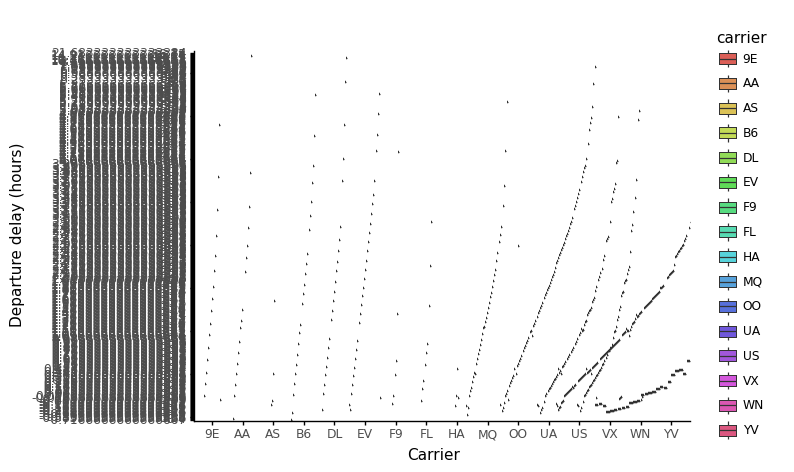

<ggplot: (-9223371901646319496)>

In [56]:
# Generate boxplot of departure delay times by carrier
print(type(flights_weather_planes["dep_delay"].iloc[i]))
print(type(flights_weather_planes["dep_delay_hours"].iloc[i]))

(p9.ggplot(data = flights_weather_planes, 
           mapping = p9.aes(y = "dep_delay_hours", x = "carrier", fill = "carrier")) # Flipped whcih variables are on x and y axis
 + p9.geom_boxplot() 
 + p9.labs(x = "Carrier", y = "Departure delay (hours)") # Added better axis titles
 + p9.scale_color_discrete(guide = False) # Removed unecessary legend
 + p9.theme_classic() # Changed theme
)

# Something very strange is happening when I try to manipulate data with dplython and maybe there is something wrong with how I'm
# manipulating dataframes with for loops?...I think in the future I will try using other
# libraries built originally for python and see how that works.
# I also want to try a different plotting library
# I have no idea what is going wrong with this plot.....